<a href="https://colab.research.google.com/github/pramodh-1612/ML---Polynomial-Lasso-regression/blob/master/BasicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#creating random dataset 
np.random.seed(42)
X =  np.linspace(start=1,stop=11,num=50).reshape(-1,1)
Y =  2*np.square(X) + 5*X + np.random.randn(50,1)*9+ +2*np.ones((50,1))  #with variance 10 amd mean 1
Y = Y.reshape(-1,1)
m = X.shape[0]
print(m)

50


50 (50, 1)


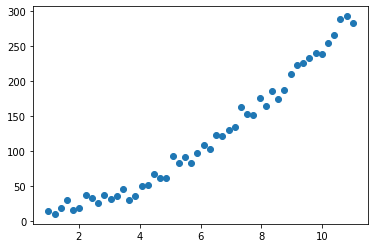

In [0]:
print(X.shape[0],Y.shape)
plt.scatter(X,Y)
plt.show()

In [0]:


"""
(ignoring the fact that the data set was just made by me) we can see from the plot
that a quadratic function would fit nicely to the dataset.hence we'll try and fit a
quadratic function.

We'll try and fit a quadratic aX^2 + bX + c to the function,using the close square solution method method.
"""
X_train = np.concatenate((np.ones((X.shape[0],1)),X,np.square(X)),axis=1)

params = np.random.randn(3,1)
params.shape

(3, 1)

In [0]:
params = np.linalg.inv((X_train.T@X_train))@X_train.T@Y

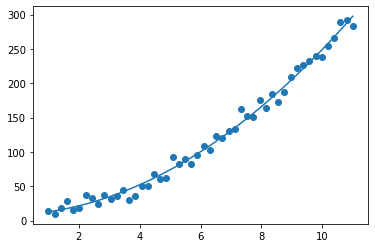

(3, 1)


In [0]:
plt.scatter(X,Y)
plt.plot(X,X_train@params)
plt.show()
print((X_train.T@((X_train@params).reshape(-1,1)-Y)).shape)

In [0]:
#using scikit-learn to do the same thing.

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

PolyReg = PolynomialFeatures(degree = 2)
X_scikit = PolyReg.fit_transform(X)  
linear = LinearRegression() 
linear.fit(X_scikit,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

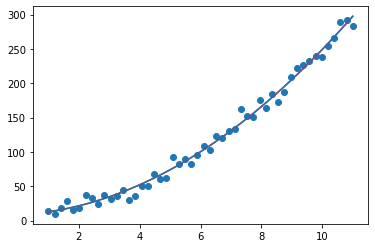

In [0]:
#comparing scikit learn and our model
plt.scatter(X, Y) 
plt.plot(X, linear.predict(X_scikit), color = 'red')
plt.plot(X,X_train@params)
plt.show() 

In [0]:
"""
as we can see they both match exactly.
"""